# Goal Definition

# Importing Essential Libraries

In [1]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import auc
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Loading Dataset

In [3]:
# Loading dataset

# from google.colab import drive
# drive.mount("/content/drive")
df_be= pd.read_csv('healthcare-dataset-stroke-data.csv')

Dataset before encoding will be assigned the variable (df_be)

In [4]:
# #  Reading Dataset and displaying first 5 rows
# df_be = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
df_be.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing

Dropping the unnecessary columns i.e Patient ID

In [5]:
df_be.drop(['id'], axis=1, inplace=True)

In [6]:
gender_counts = df_be['gender'].value_counts()
total_entries = len(df_be)
gender_percentages = (gender_counts / total_entries) * 100

print("Gender Percentages:")
print(gender_percentages)

Gender Percentages:
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: count, dtype: float64


In [7]:
gender_counts

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
df_be[df_be['gender']== 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


We can see that the there is only one case of gender identified as (other), and it is  not labeled as stroke, in this case this instance is insignificant and best to be dropped to avoid having a designated category only for (other) when perfoming encoding

In [9]:
df_be.drop(df_be[df_be['gender']== 'Other'].index,inplace= True)
df_be.shape

(5109, 11)

In [10]:
df_be.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Exploring missing values

In [11]:
df_be.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
ratio_of_missing_data =(df_be["bmi"].isnull().sum() / df_be.shape[0]) * 100
print("Ratio of Missing Data",(ratio_of_missing_data),'%')


Ratio of Missing Data 3.9342337052260716 %


Missing bmi values represent almost 4% of the dataset, so based on the data size 5000+, we will not drop missing values in the bmi column

## Dealing with Missing Data, using Median

In [13]:
median_bmi =df_be['bmi'].median()
df_be['bmi'].fillna(median_bmi, inplace =True)

Checking data frame to confirm abscence of null data

In [14]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dicovering data counts and distributions

In [15]:
df_be['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

The distribution analysis of the two classes above indicate that this dataset is imbalanced as only 249 cases out of 5000+ samples are labelled as stroke. Therefore, we will need to apply techniques to balance the dataset prior to model development.

In [16]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = [ 'age', 'avg_glucose_level', 'bmi']

## Exploratory Data Analysis

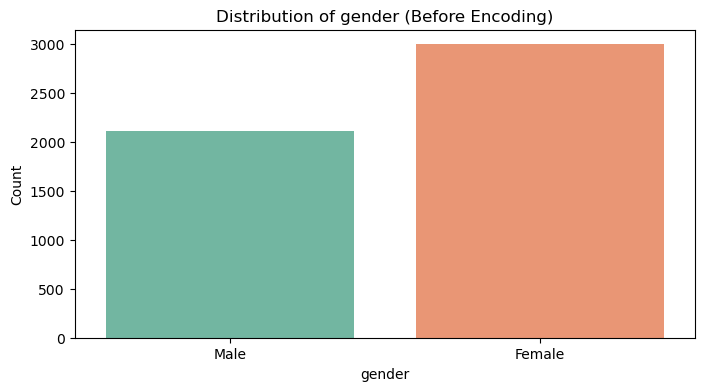

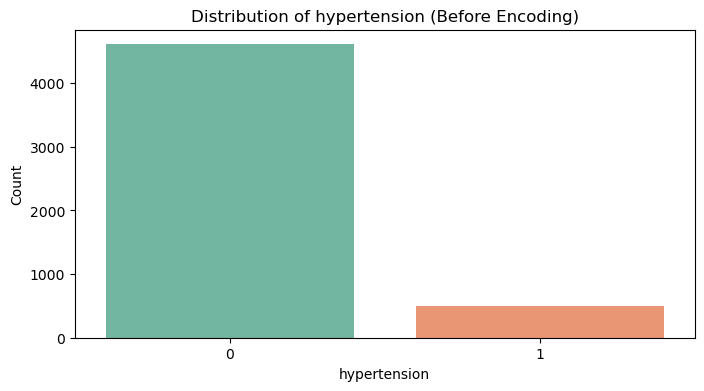

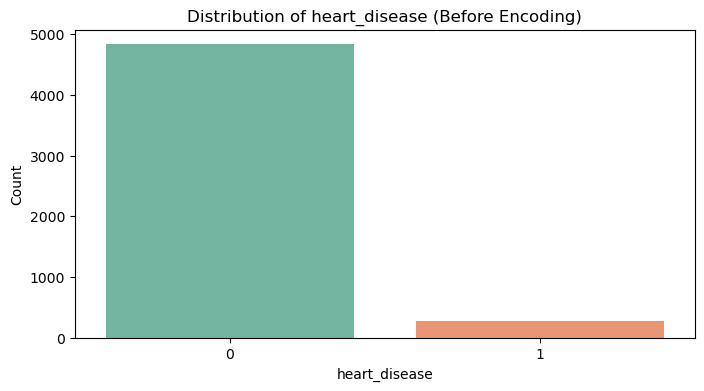

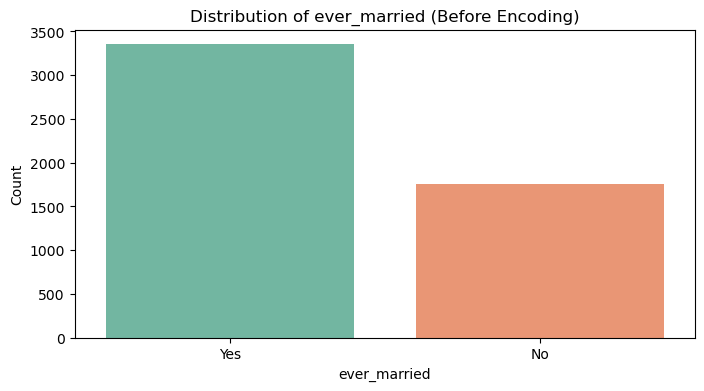

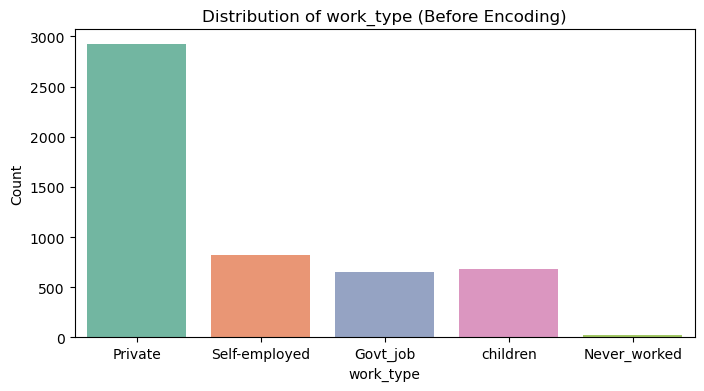

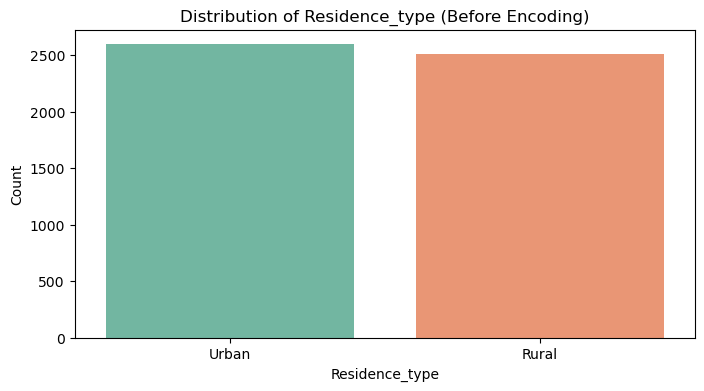

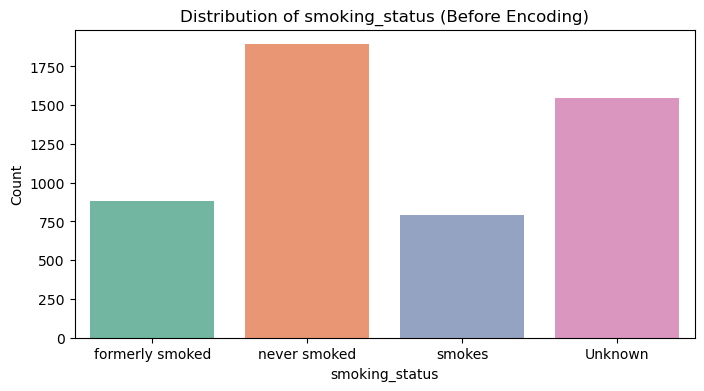

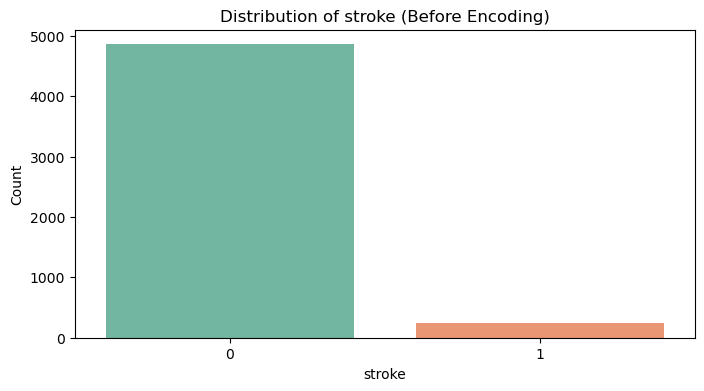

In [17]:
for feature in categorical_features:
   plt.figure(figsize=(8, 4))
   sns.countplot(data=df_be, x=feature, palette='Set2')
   plt.title(f'Distribution of {feature} (Before Encoding)')
   plt.xlabel(feature)
   plt.ylabel('Count')

   plt.show()

Distribution of categorical features using pie chart and percentage of occurrences

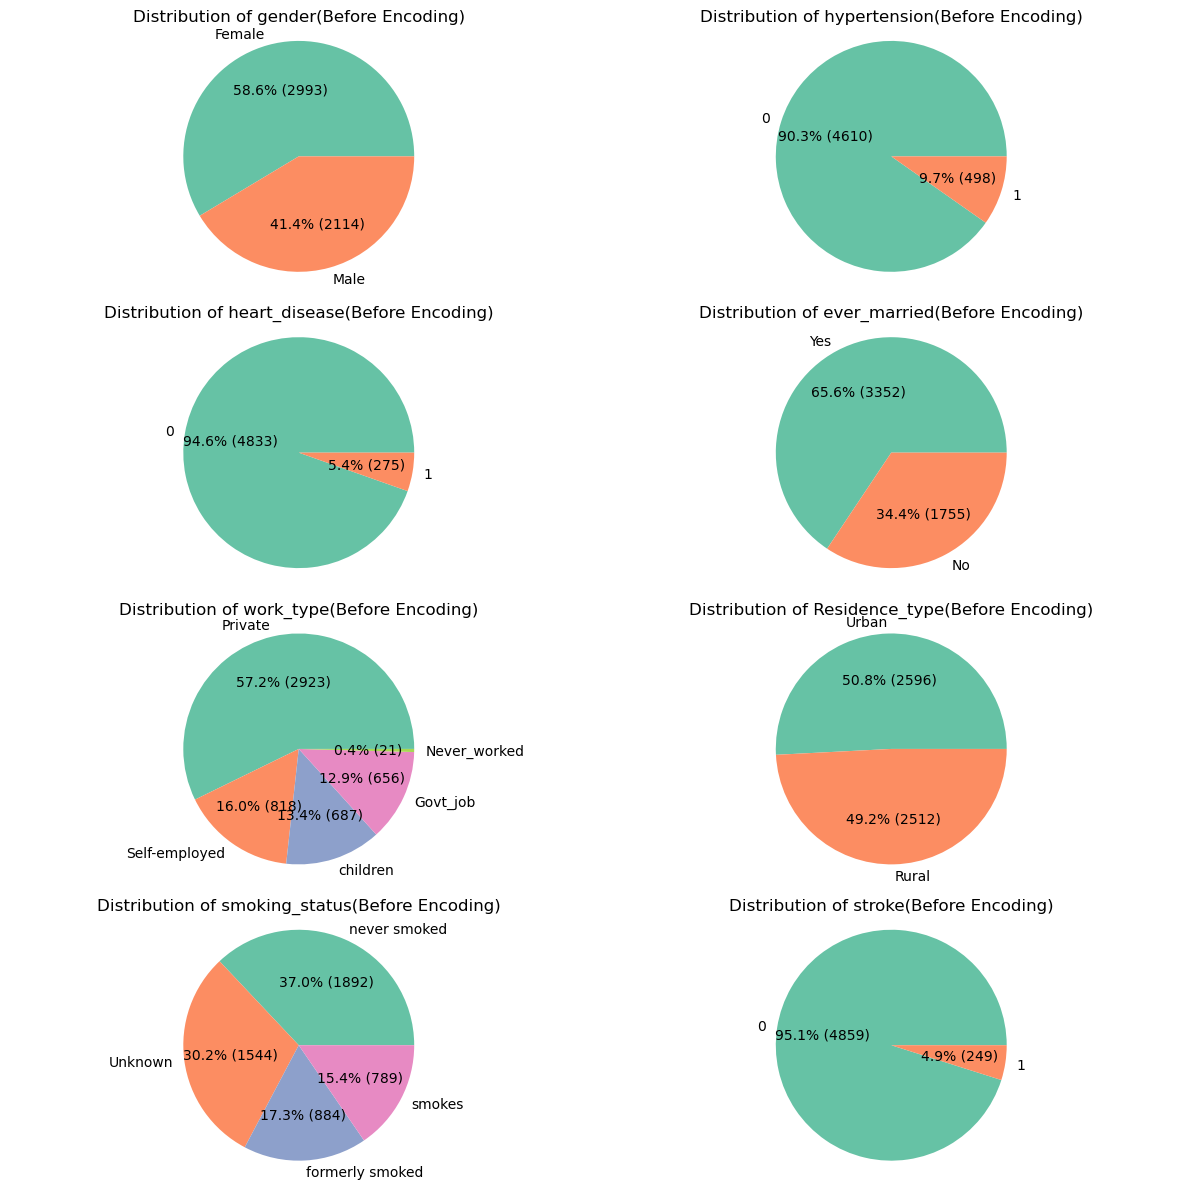

In [18]:
num_rows = 4
num_cols = 2
total_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for idx, feature in enumerate(categorical_features[:total_plots]):
    row = idx // num_cols
    col = idx % num_cols

    category_counts = df_be[feature].value_counts()

    axes[row, col].pie(category_counts, labels=category_counts.index, autopct=lambda pct: f"{pct:.1f}% ({int(pct * sum(category_counts)/100)})",colors=sns.color_palette('Set2', len(category_counts)))
    axes[row, col].set_title(f'Distribution of {feature}(Before Encoding)')
    axes[row, col].axis('equal')

plt.tight_layout()
plt.show()


Distribution of features - numerical features

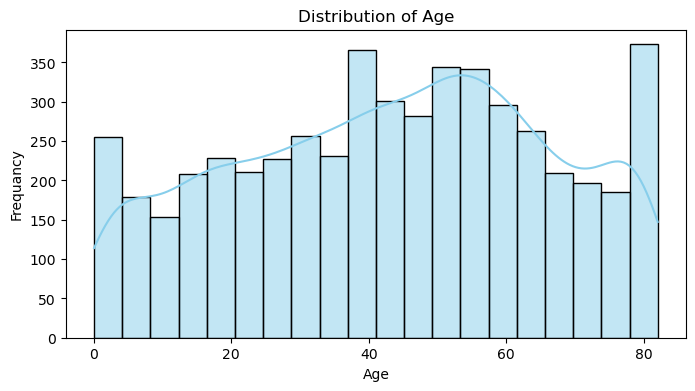

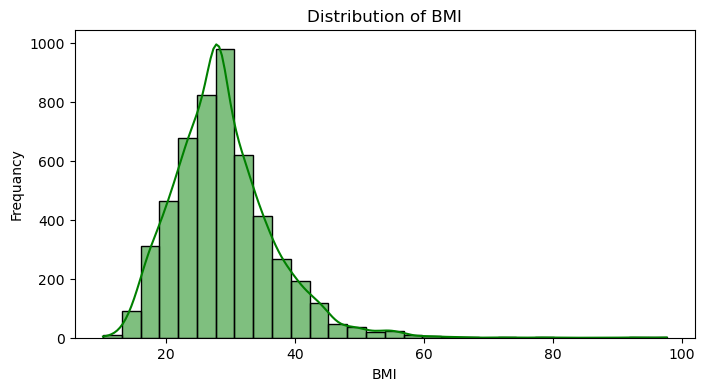

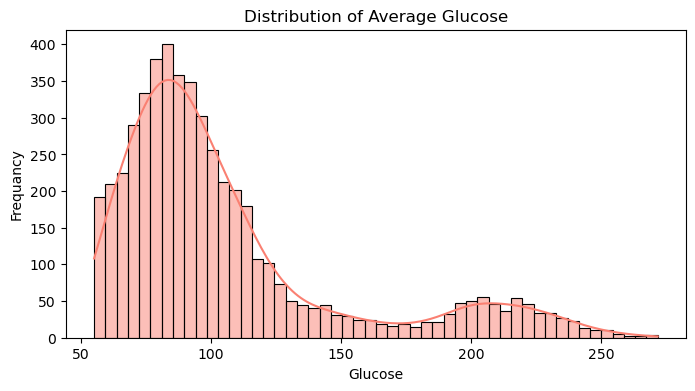

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df_be['age'],bins=20, kde= True, color='skyblue' )
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['bmi'],bins=30, kde= True, color='green' )
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['avg_glucose_level'],bins=50, kde= True, color='salmon' )
plt.title('Distribution of Average Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequancy')
plt.show()

Distribution of numerical features by output 'stroke'

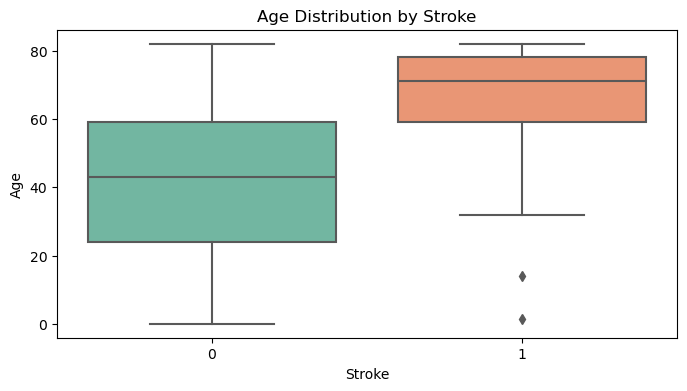

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='age', palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

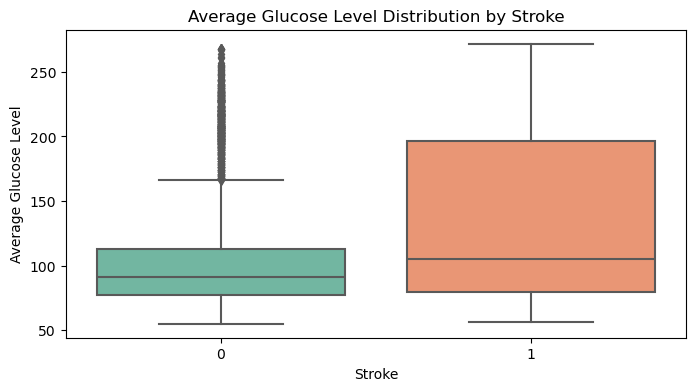

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

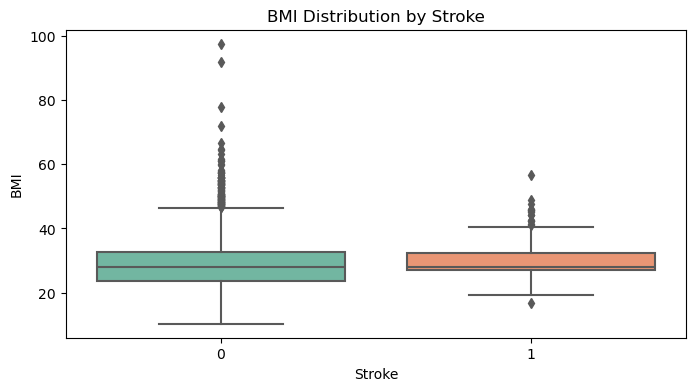

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

Based on the above, we can notice that individuals who are older with higher glucose level were more likely to have a stroke. Also, we notice that bmi index might not be significant indicator for probability of getting a stroke

In [23]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Encoding of dataset

  Enconding of Categorical features : Based on data type, we will use OneHotEncoder to avoid ordinalty assumptions. However, first column of each encoded feature will be dropped to reduce multicollinearity and reduce number of features

In [24]:
# categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# categorical_data = df_be[categorical_variables]
# encoder = OneHotEncoder(sparse_output = False, drop ='first')
# encoded_data = encoder.fit_transform(categorical_data)
# encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
# df = pd.concat([df_be.drop(columns=categorical_variables), encoded_dataframe], axis=1)
# df.head(5)

In [25]:
df = pd.get_dummies(df_be, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True, dtype=int)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [26]:
df.shape

(5109, 16)

In [27]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [28]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


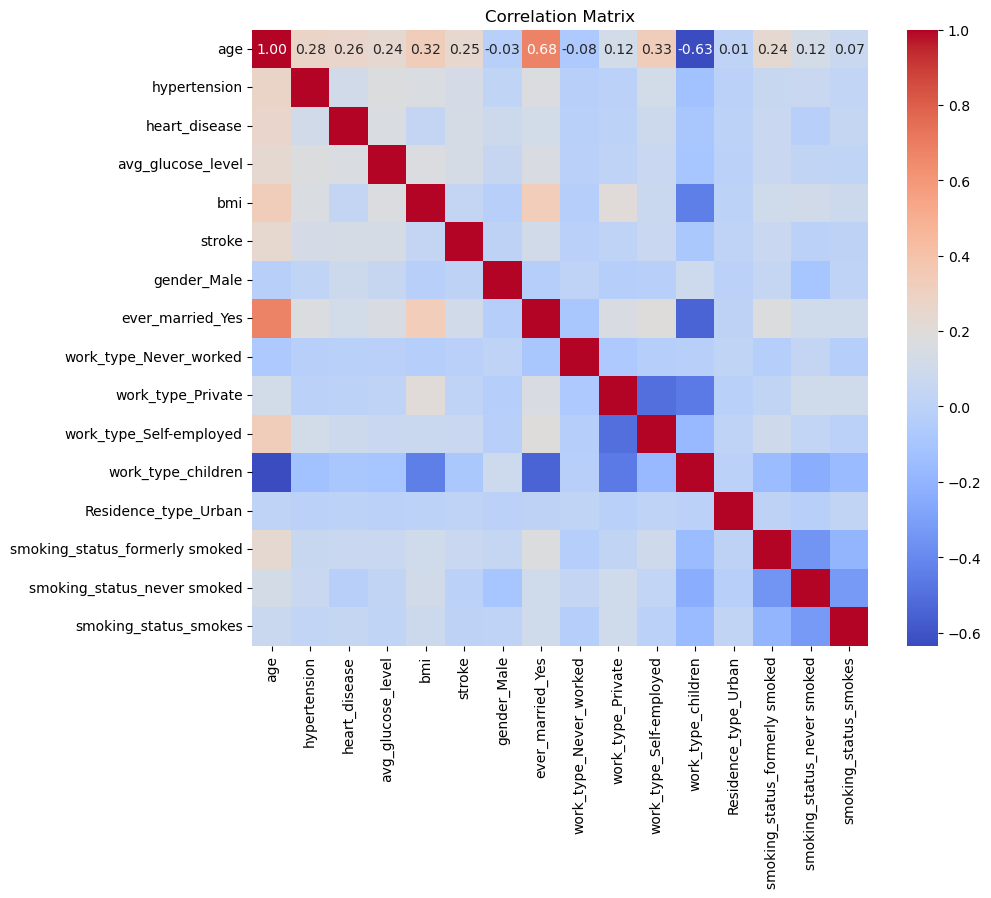

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

* Maybe we should consider dropping (work_type_children) as its highly correlated with age, ever_married ?? Conifrm with team

Features Relatioship with the output stroke

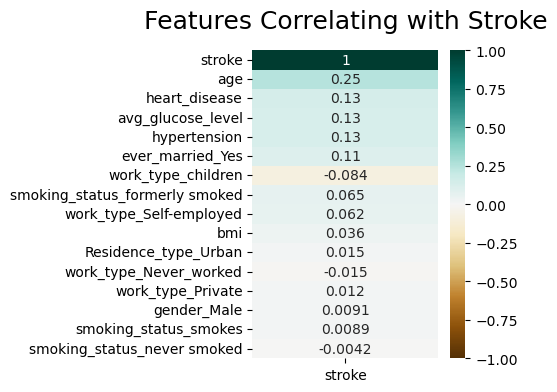

In [30]:
plt.figure(figsize=(3, 4))
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', key=abs, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

Based on the above understanding of the features we notice that : age, heart disease, average glucose level, hypertension ,and marriage status are the mostly influenced features with stroke. However, smoking status, gender are the least correlated to stroke.

Based on the correlation matrix, we determined that the 'work_type_children' column can be dropped as it is highly correlated with other independent variables (i.e., age, ever_married_Yes). In addition, further analysis showed that it is not strongly correlated with the output variable, 'stroke'. Therefore, dropping this column may reduce some of the multicollinearity and will not have an affect on accurately predicting the target variable.  

In [31]:
df.drop(['work_type_children'], axis=1, inplace=True)

In [32]:
df.shape

(5109, 15)

## Outlier Detection

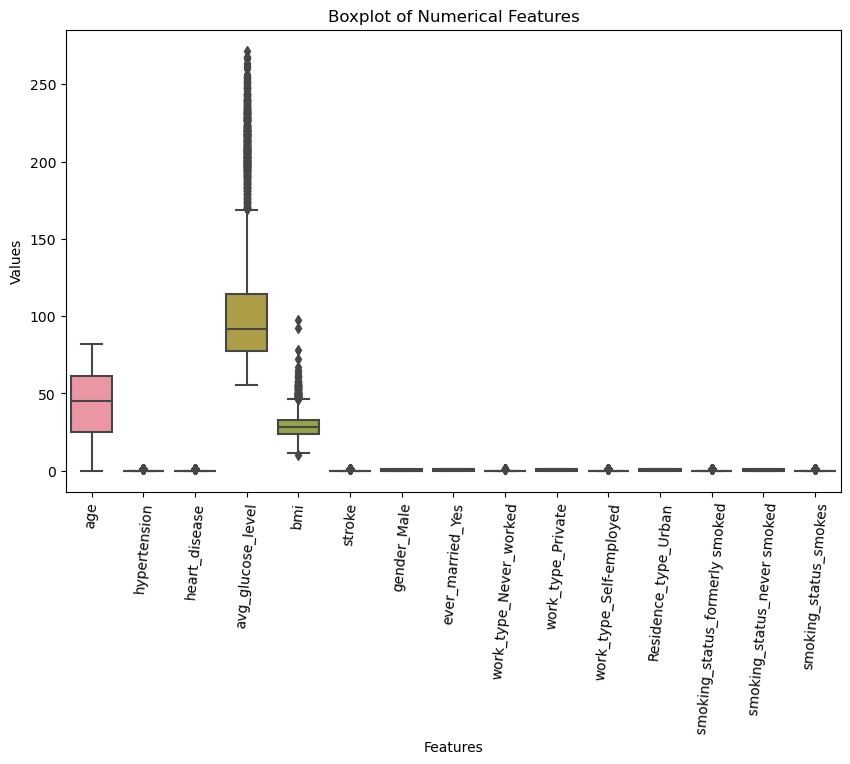

In [33]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

## Handling Skewness

In [34]:
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
avg_glucose_level                  1.572815
bmi                                1.087929
smoking_status_never smoked        0.537226
gender_Male                        0.349410
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

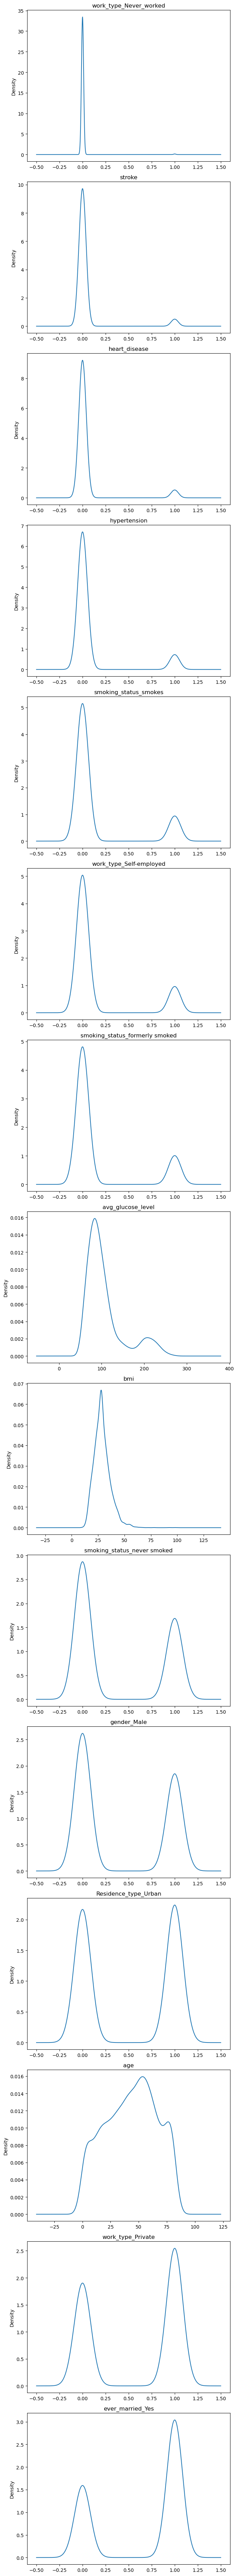

In [35]:
# Visualizing skewness for each attribute in the dataset
# List of parameters for density plot
parameters = ['work_type_Never_worked', 'stroke', 'heart_disease', 'hypertension',
              'smoking_status_smokes', 'work_type_Self-employed',
              'smoking_status_formerly smoked', 'avg_glucose_level', 'bmi',
              'smoking_status_never smoked', 'gender_Male', 'Residence_type_Urban',
              'age', 'work_type_Private', 'ever_married_Yes']

# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(7, 5 * len(parameters)))

# Loop through parameters and plot density plots
for i, param in enumerate(parameters):
    df[param].plot(kind='density', ax=axes[i])
    axes[i].set_title(param)

plt.tight_layout()
plt.show()

In [36]:
# List of attributes to analyze
attributes = ['stroke', 'heart_disease', 'hypertension', 'avg_glucose_level', 'bmi',
    'age', 'gender_Male', 'Residence_type_Urban', 'ever_married_Yes',
    'work_type_Private', 'work_type_Self-employed',
    'work_type_Never_worked', 'smoking_status_smokes',
    'smoking_status_formerly smoked', 'smoking_status_never smoked']
# Dictionary to store skewness before and after transformations
skewness_results = {}

for attribute in attributes:
    try:
        # Display skewness before transformation
        attribute_skewness = df[attribute].skew()
        print(f"\nSkewness of '{attribute}': {attribute_skewness}")

        # Apply log transformation
        log_attribute = np.log1p(df[attribute])
        log_skewness = log_attribute.skew()
        print(f"Skewness after Log Transformation: {log_skewness}")

        # Apply sqrt transformation
        sqrt_attribute = df[attribute]**(1/2)
        sqrt_skewness = sqrt_attribute.skew()
        print(f"Skewness after Square Root Transformation: {sqrt_skewness}")

        # Apply reciprocal transformation
        reciprocal_attribute = 1 / df[attribute]
        reciprocal_skewness = reciprocal_attribute.skew()
        print(f"Skewness after Reciprocal Transformation: {reciprocal_skewness}")

        # Apply Box-Cox transformation
        bcx_attribute, _ = boxcox(df[attribute])
        bcx_skewness = pd.Series(bcx_attribute).skew()
        print(f"Skewness after Box-Cox Transformation: {bcx_skewness}")

        # Apply Yeo-Johnson transformation
        yf_attribute, _ = yeojohnson(df[attribute])
        yf_skewness = pd.Series(yf_attribute).skew()
        print(f"Skewness after Yeo-Johnson Transformation: {yf_skewness}")

        # Store skewness results in dictionary
        skewness_results[attribute] = {
            'Original': attribute_skewness,
            'Log': log_skewness,
            'Square Root': sqrt_skewness,
            'Reciprocal': reciprocal_skewness,
            'Box-Cox': bcx_skewness,
            'Yeo-Johnson': yf_skewness
        }
    except Exception as e:
        print(f"Error occurred while processing '{attribute}': {e}")


Skewness of 'stroke': 4.1928068074994735
Skewness after Log Transformation: 4.192806807499474
Skewness after Square Root Transformation: 4.1928068074994735
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'stroke': Data must be positive.

Skewness of 'heart_disease': 3.9467864430646906
Skewness after Log Transformation: 3.9467864430646906
Skewness after Square Root Transformation: 3.9467864430646906
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'heart_disease': Data must be positive.

Skewness of 'hypertension': 2.715026136949753
Skewness after Log Transformation: 2.7150261369497537
Skewness after Square Root Transformation: 2.715026136949753
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'hypertension': Data must be positive.

Skewness of 'avg_glucose_level': 1.5728153284961561
Skewness after Log Transformation: 0.8900502459430993
Skewness after Square Root Transformation: 1.243310584696458
Sk

In [37]:
# ## Applying skewness from calculated
df['avg_glucose_level'], lambda_bc = boxcox(df['avg_glucose_level'])
df['bmi'], lambda_yj = yeojohnson(df['bmi'])

# df['avg_glucose_level'] = np.reciprocal(df['avg_glucose_level'])
# df['bmi'] = np.log(df['bmi'])

In [38]:
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
smoking_status_never smoked        0.537226
gender_Male                        0.349410
avg_glucose_level                  0.083304
bmi                               -0.001035
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

## Label Selection

In [39]:
y = df['stroke']
x = df.drop('stroke',axis=1)

## Data Splitting

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
y_train.shape

(4087,)

In [42]:
y.shape

(5109,)

## Handling Imbalance in target variable

In [43]:
train_df = pd.concat([x_train, y_train], axis=1)

In [44]:
# train_df.to_excel('train_dataset.xlsx', index=False)

In [45]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

In [46]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
#smote = SMOTE(random_state=42)

In [48]:
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train.ravel())

In [49]:
#x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [50]:
x_resampled_df = pd.DataFrame(x_train_resampled, columns=x.columns)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['stroke'])

In [51]:
balanced_train_df = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [52]:
# balanced_train_df.to_excel('balanced_dataset.xlsx', index=False)

In [53]:
# y_train = balanced_train_df['stroke']
# x_train = balanced_train_df.drop('stroke',axis=1)

In [54]:
x_train_resampled.shape

(7800, 14)

In [55]:
y_train_resampled.shape

(7800,)

## Normalization

In [56]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train_resampled)
#scaled_x_val = scaler.transform(x_validation)
scaled_x_test = scaler.transform(x_test)

## Principle Component Analysis

In [57]:
# pca = PCA ()
# pca.fit(scaled_x_train)
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# n_components = np.arange(1, len(explained_variance_ratio) + 1)
# index_80_percent = np.argmax(cumulative_variance_ratio >= 0.9) + 1

# plt.figure(figsize=(8, 6))
# plt.plot(n_components, cumulative_variance_ratio, marker='o', linestyle='-')
# plt.axhline(y=0.8, color='r', linestyle='-')
# plt.axvline(x=index_80_percent, color='g', linestyle='--')
# plt.title('Cumulative Explained Variance Ratio')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.grid(True)
# plt.xticks(n_components)
# plt.show()

In [58]:
# pca = PCA(n_components=11)
# X_train_pca = pca.fit_transform(scaled_x_train)
# X_val_pca = pca.fit_transform(scaled_x_val)
# X_test_pca = pca.transform(scaled_x_test)

## Random Forest Modling for Immbalanced Data 

In [59]:
scaler_im = StandardScaler()
scaled_x_train_im = scaler_im.fit_transform(x_train)
#scaled_x_val = scaler.transform(x_validation)
# scaled_x_test = scaler.transform(x_test)


In [60]:
y_train.shape

(4087,)

In [61]:
scaled_x_train_im.shape

(4087, 14)

In [62]:
x_train.shape

(4087, 14)

In [63]:
y_test.shape

(1022,)

In [64]:
x_test.shape

(1022, 14)

In [107]:
randomforest_im = RandomForestClassifier()
rfc_im = RandomForestClassifier(max_features=24,max_depth=900,n_estimators=104,bootstrap=True)
rfc_im.fit(scaled_x_train_im,y_train)
rfc_im_pred = rfc_im.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_im_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_im_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  0.9363992172211351


In [104]:
rfc_im_pred
countPred = 0
for y in y_test:
    if y == 1:
        countPred += 1
countPred

62

In [69]:
randomforest_im = RandomForestClassifier()
rfc_im = RandomForestClassifier(max_features=7,max_depth=3,n_estimators=64,bootstrap=True)
rfc_im.fit(scaled_x_train_im,y_train)
rfc_im_pred = rfc_im.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_im_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_im_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  0.9393346379647749


In [66]:
randomforest_im = RandomForestClassifier()
rfc_im = RandomForestClassifier(max_features=7,max_depth=10,n_estimators=64,bootstrap=False)
rfc_im.fit(scaled_x_train_im,y_train)
rfc_im_pred = rfc_im.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_im_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_im_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  0.9383561643835616


In [70]:
randomforest_im = RandomForestClassifier()
rfc_im = RandomForestClassifier(max_features=7,max_depth=10,n_estimators=64,bootstrap=True)
rfc_im.fit(scaled_x_train_im,y_train)
rfc_im_pred = rfc_im.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_im_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_im_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  0.9393346379647749


In [67]:
randomforest_im = RandomForestClassifier()
rfc_im = RandomForestClassifier(max_features=7,max_depth=20,n_estimators=64,bootstrap=True)
rfc_im.fit(scaled_x_train_im,y_train)
rfc_im_pred = rfc_im.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_im_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_im_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  0.9373776908023483


In [68]:
randomforest_im = RandomForestClassifier()
rfc_im = RandomForestClassifier(max_features=7,max_depth=7,n_estimators=64,bootstrap=False)
rfc_im.fit(scaled_x_train_im,y_train)
rfc_im_pred = rfc_im.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_im_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_im_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  0.9393346379647749


In [72]:
randomforest_im = RandomForestClassifier()
rfc_im = RandomForestClassifier(max_features=7,max_depth=7,n_estimators=64,bootstrap=True)
rfc_im.fit(scaled_x_train_im,y_train)
rfc_im_pred = rfc_im.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_im_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_im_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  0.9393346379647749


#### The above results of deploying Random Forest Classifer for the data before handeling with imbalance (immbalanced data) shows that although accuracy is fairly high, the model was not able to capture any of the minroity class (1) (stoke) giving a 0 % for both recall as well as precision. Meanwhile, the model is giving 100% recall for the majority class (0) which means it was able to predict majority class with high performance. however,this is not a favorable result as recalls for the minority class is extermely low 0 % and we need this to be fairly high especially in Medical Datasets to properly predict positive cases and reduce false negatives. Hence, dealing with immbalanced data is a must before expecting and acceptable performance from this model. 

#### Hyperparameter tuning by GridSearch for RandomForest before dealing with imbalance 

In [73]:
param_grid = {'n_estimators': [64, 100, 128, 200],'max_features': [2, 3, 5, 7], 'max_depth': [3, 7, 10, 15, 20, 30],'bootstrap': [True, False]}


In [74]:
rf_im=RandomForestClassifier()

In [75]:

grid_search_im = GridSearchCV(estimator=rf_im, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_im.fit(scaled_x_train_im, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 7, 10, 15, 20, 30],
                         'max_features': [2, 3, 5, 7],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='accuracy')

In [81]:
best_params = grid_search_im.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': False, 'max_depth': 7, 'max_features': 5, 'n_estimators': 200}


In [87]:
rf_best = RandomForestClassifier(max_features=5,n_estimators=200,bootstrap=False, max_depth=7)

In [90]:
rf_best.fit(scaled_x_train_im,y_train)

RandomForestClassifier(bootstrap=False, max_depth=7, max_features=5,
                       n_estimators=200)

In [94]:
y_pred_im = rf_best.predict(scaled_x_test)

In [95]:
print(metrics.classification_report(y_test,y_pred_im))
accuracy = accuracy_score(y_test,y_pred_im)
print('Accuracy Score: ',accuracy*100,"%")


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy Score:  93.9334637964775 %


# Model Training

## Support Vector Machine

In [ ]:
svc = SVC(kernel='linear')
svc.fit(scaled_x_train, y_train_resampled)
predicted_output = svc.predict(scaled_x_test)
accuracy = metrics.accuracy_score(y_test, predicted_output) * 100
print("Accuracy:",accuracy,"%")

Accuracy: 76.90802348336595 %


In [ ]:
metrics_report = metrics.classification_report(y_test, predicted_output)
print(metrics_report)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       960
           1       0.14      0.53      0.22        62

    accuracy                           0.77      1022
   macro avg       0.55      0.66      0.54      1022
weighted avg       0.91      0.77      0.83      1022



In [ ]:
cmatrix = confusion_matrix(y_test,predicted_output)
print(cmatrix)

[[753 207]
 [ 29  33]]


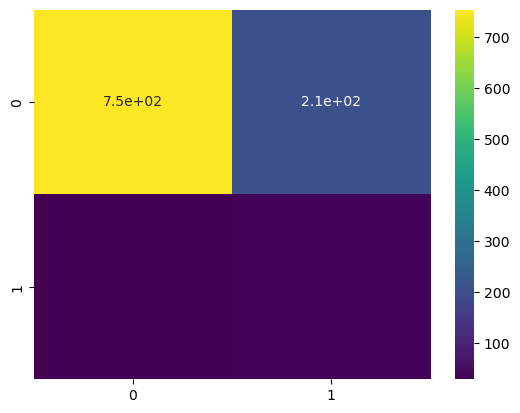

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicted_output),cmap='viridis',annot=True);

In [ ]:
tp = 762
tn = 31
total_observation = 1022
acc = (tp + tn) / total_observation
print("Accuracy:",acc*100,"%")

Accuracy: 77.59295499021526 %


AUC value is: 0.5502078005115089


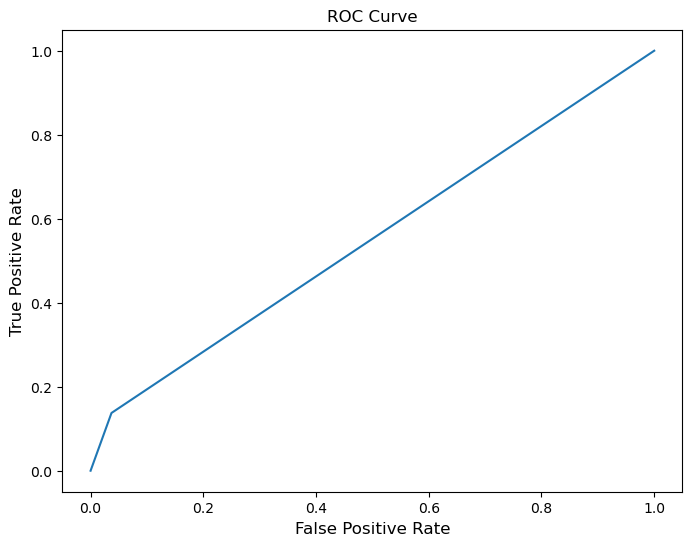

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(predicted_output, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Logistic Regression

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=3,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       960
           1       0.15      0.84      0.25        62

    accuracy                           0.70      1022
   macro avg       0.57      0.76      0.53      1022
weighted avg       0.93      0.70      0.78      1022

Accuracy Score:  0.6986301369863014


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=20,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.10      0.10      0.10        62

    accuracy                           0.89      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.89      0.89      0.89      1022

Accuracy Score:  0.8933463796477495


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=10,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.13      0.27      0.18        62

    accuracy                           0.85      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.90      0.85      0.87      1022

Accuracy Score:  0.8483365949119374


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=15,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       960
           1       0.10      0.13      0.12        62

    accuracy                           0.88      1022
   macro avg       0.52      0.53      0.53      1022
weighted avg       0.89      0.88      0.89      1022

Accuracy Score:  0.8796477495107632


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=7,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       960
           1       0.15      0.47      0.23        62

    accuracy                           0.81      1022
   macro avg       0.56      0.65      0.56      1022
weighted avg       0.91      0.81      0.85      1022

Accuracy Score:  0.8091976516634051


In [ ]:
n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]
max_depth = [3,7,10,15,20,30]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
              'max_depth':max_depth}

In [ ]:
randomforest = RandomForestClassifier()

In [ ]:
grid = GridSearchCV(randomforest,param_grid)

In [ ]:
grid.fit(scaled_x_train,y_train_resampled)

In [ ]:
grid.best_params_

{'bootstrap': False, 'max_depth': 30, 'max_features': 5, 'n_estimators': 200}

In [ ]:
rfc = RandomForestClassifier(max_features=5,n_estimators=200,bootstrap=False, max_depth=20)

In [ ]:
rfc.fit(scaled_x_train,y_train_resampled)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=5,
                       n_estimators=200)

In [ ]:
rfc_tuned_pred = rfc.predict(scaled_x_test)

In [ ]:
print(metrics.classification_report(y_test,rfc_tuned_pred))
accuracy = accuracy_score(y_test,rfc_tuned_pred)
print('Accuracy Score: ',accuracy*100,"%")

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.08      0.08      0.08        62

    accuracy                           0.89      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.89      0.89      0.89      1022

Accuracy Score:  89.13894324853229 %


In [ ]:
cmatrix = confusion_matrix(y_test,rfc_tuned_pred)
print(cmatrix)

[[906  54]
 [ 57   5]]


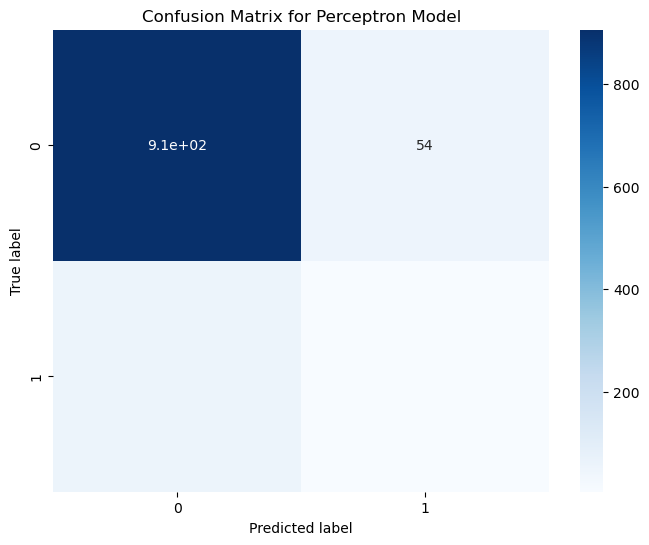

numpy.int64

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,rfc_tuned_pred),cmap='Blues',annot=True);
confusion_matrix(y_test,rfc_tuned_pred)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Perceptron Model')
plt.show()
confusion_matrix(y_test,rfc_tuned_pred)[0]
type(confusion_matrix(y_test,rfc_tuned_pred)[1][0])



### Random Forest with immbalanced data 

ValueError: Found input variables with inconsistent numbers of samples: [1022, 4087]

## Naive Bayes

## Multi Layer Perceptron

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_x_train, y_train_resampled, test_size=0.2, random_state=42)

NameError: name 'scaled_x_train' is not defined

## Validation Splitting

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train_resampled, y_train_resampled, test_size=0.1, random_state=42)

### Hyper Parameter Tuning for MLP